In [4]:
import numpy as np
import pandas as pd
import torch

from gym_anytrading.envs import StocksEnv
from gym_anytrading.envs import Actions
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.dqn import MlpPolicy

# from agent import Agent
# from rat.test_env import StockTradingEnv
import yfinance as yf
import quantstats as qs

In [3]:
models_dir=r"D:\all projects\stock-traiding\models"


data = yf.download("AAPL", period="5d", interval="1m")
env = StocksEnv(df=data, window_size=30, frame_bound=(30, len(data)))

D:\all projects\stock-traiding\.venv\lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float16
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
[*********************100%%**********************]  1 of 1 completed


In [34]:


env.save_rendering(r"D:\all projects\stock-traiding\render_logs")
# env = DummyVecEnv([lambda: env])
batch_size=32
# Example usage:
# Initialize an agent
# Initialize DQN model
print("env creatre")
train=True
# model = DQN(MlpPolicy, env, verbose=1, tensorboard_log=r"D:\all projects\stock-traiding\tensor_log")
model = DQN.load(model)

if train:
    TIMESTEPS = 10000
    iters = 0
    for i in range(30):
        model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False)
        model.get_env().unwrapped
        model.save(f"{models_dir}/{TIMESTEPS * i}")

    # Save the model
    # model.save("dqn_stock_trading")

env creatre


AssertionError: You must set the environment before calling _setup_learn()

<Figure size 1000x600 with 0 Axes>

## Test gymnas

In [5]:
from matplotlib import pyplot as plt
import gymnasium as gym
import gym_trading_env

# data = yf.download("AAPL",period="50d", interval="1d")
# data = yf.download("AAPL",period="730d", interval="1h")
data = yf.download("AAPL",start="2021-01-01",end="2022-05-11", interval="1d")

env = StocksEnv(df=data, window_size=30, frame_bound=(30, len(data)))
data.columns=[i.lower() for i in data.columns]
data=data.tz_localize(None)
env=gym.make("TradingEnv",
         name="Apple",
         df=data,  # Your dataset with your custom features
         positions=[-1, 0, 1],  # -1 (=SHORT), 0(=OUT), +1 (=LONG)
         trading_fees=0.01 / 100,  # 0.01% per stock buy / sell (Binance fees)
         borrow_interest_rate=0.0003 / 100,  # 0.0003% per timestep (one timestep = 1h here)
         )
# data.index=pd.DatetimeIndex([i.replace(tzinfo=None) for i in data.index])
data.index=pd.DatetimeIndex([i.replace(tzinfo=None) for i in data.index])
model=r"D:\all projects\stock-traiding\models_backup\gymnasium_1000000.zip"
# model=r"D:\all projects\stock-traiding\models\rl_model_1000000_steps.zip"
loaded_model = DQN.load(model)
# action_stats = {Actions.Sell: 0, Actions.Buy: 0}

observation, info = env.reset()

while True:
    # action = env.action_space.sample()
    action, _states = loaded_model.predict(observation)

    # action_stats[Actions(action)] += 1
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    
    # env.render()
    if done:
        env.unwrapped.save_for_render(dir = "render_logs")
        break
# plt.figure(figsize=(16, 6))
# env.unwrapped.render_all()
# 
# plt.show()
env.close()

# print("action_stats:", action_stats)
print("info:", info)

[*********************100%%**********************]  1 of 1 completed


Market Return : 19.40%   |   Portfolio Return :  7.84%   |   
info: {'idx': 340, 'step': 340, 'date': numpy.datetime64('2022-05-10T00:00:00.000000000'), 'position_index': array(2, dtype=int64), 'position': 1, 'real_position': 0.9999967839643729, 'data_high': 156.74000549316406, 'data_open': 155.52000427246094, 'data_close': 154.50999450683594, 'data_low': 152.92999267578125, 'data_volume': 115366700.0, 'data_adj close': 152.78146362304688, 'portfolio_valuation': 1078.3595188647146, 'portfolio_distribution_asset': 6.979199334411819, 'portfolio_distribution_fiat': 0.0034680426315389923, 'portfolio_distribution_borrowed_asset': 0, 'portfolio_distribution_borrowed_fiat': 0, 'portfolio_distribution_interest_asset': 0.0, 'portfolio_distribution_interest_fiat': 0.0, 'reward': 0.015983568048524945}


## anytrade

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


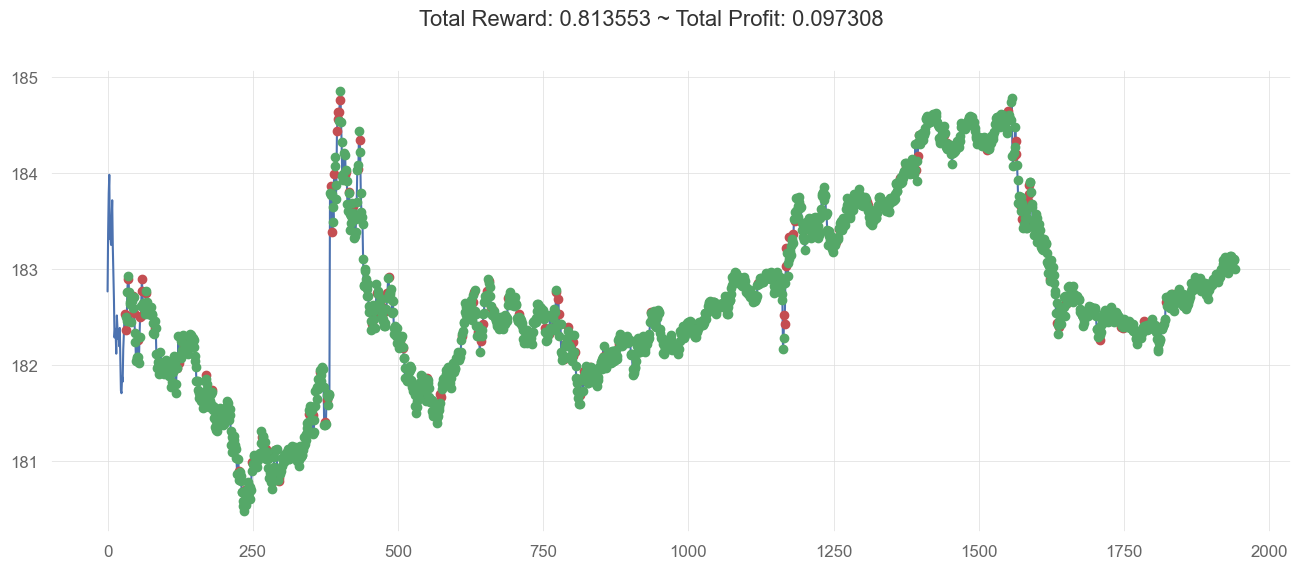

action_stats: {<Actions.Sell: 0>: 172, <Actions.Buy: 1>: 1739}
info: {'total_reward': 0.8135528564453125, 'total_profit': 0.097307630151225, 'position': <Positions.Long: 1>}


In [5]:
from matplotlib import pyplot as plt
import gymnasium as gym
# import gym_trading_env

data = yf.download("AAPL",period="50d", interval="1d")
# data = yf.download("AAPL",period="730d", interval="1h")
data = yf.download("AAPL",start="2021-01-01",end="2022-05-11", interval="1d")
data = yf.download("AAPL", period="5d", interval="1m")
start_index=30

end_index=len(data)

env = StocksEnv(df=data, window_size=start_index, frame_bound=(start_index, end_index))

# data.index=pd.DatetimeIndex([i.replace(tzinfo=None) for i in data.index])

model=r"D:\all projects\stock-traiding\models\rl_model_1000000_steps.zip"
loaded_model = DQN.load(model)
action_stats = {Actions.Sell: 0, Actions.Buy: 0}

observation, info = env.reset()

while True:
    # action = env.action_space.sample()
    action, _states = loaded_model.predict(observation)

    action_stats[Actions(action)] += 1
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    
    # env.render()
    if done:
        break
plt.figure(figsize=(16, 6))
env.unwrapped.render_all()

plt.show()
env.close()

print("action_stats:", action_stats)
print("info:", info)

D:\all projects\stock-traiding\.venv\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
D:\all projects\stock-traiding\.venv\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
D:\all projects\stock-traiding\.venv\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  retu

                           Strategy
-------------------------  ----------
Start Period               2024-05-06
End Period                 2024-05-10
Risk-Free Rate             0.0%
Time in Market             9.0%

Cumulative Return          -90.27%
CAGR﹪                     -100.0%

Sharpe                     -4.68
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -4.29
Sortino                    -4.49
Smart Sortino              -4.12
Sortino/√2                 -3.17
Smart Sortino/√2           -2.91
Omega                      0.0

Max Drawdown               -90.11%
Longest DD Days            5
Volatility (ann.)          6.52%
Calmar                     -1.11
Skew                       -3.15
Kurtosis                   8.1

Expected Daily %           -0.12%
Expected Monthly %         -90.27%
Expected Yearly %          -90.27%
Kelly Criterion            -
Risk of Ruin               1.0%
Daily Value-at-Risk        -0.8%
Expected Shortfall (cVaR)  -0.8%

Max Consecutive Wins      

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2024-05-06,2024-05-10,2024-05-10,5,-90.114248,-89.819139


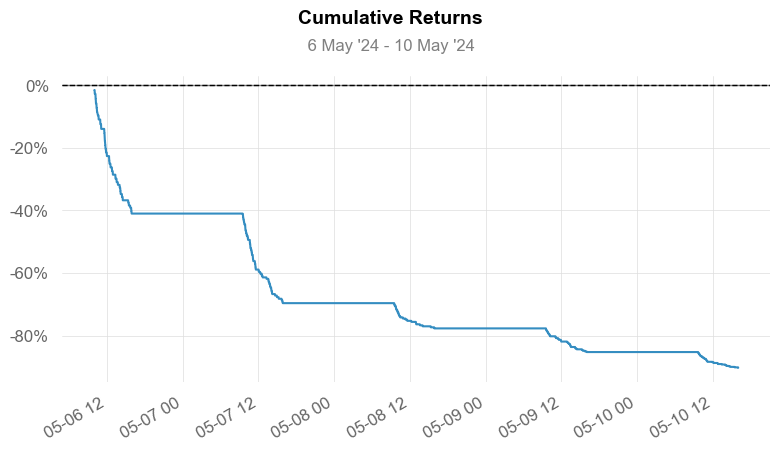

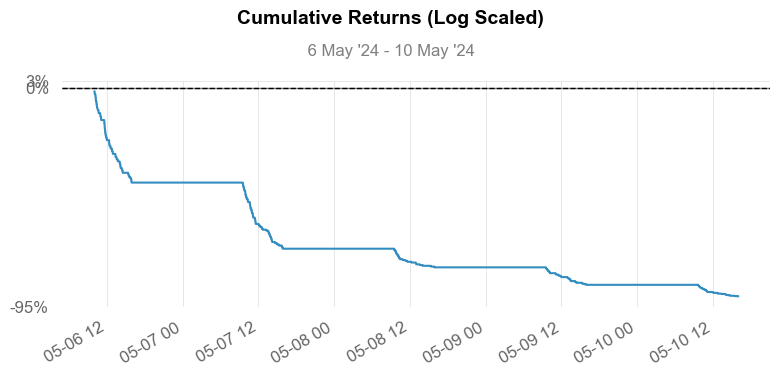

D:\all projects\stock-traiding\.venv\lib\site-packages\quantstats\_plotting\wrappers.py:565: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").apply(_stats.comp)
D:\all projects\stock-traiding\.venv\lib\site-packages\quantstats\_plotting\wrappers.py:568: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").last()


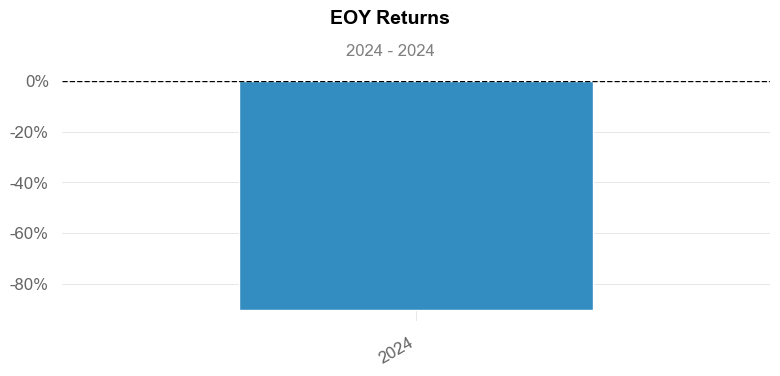

D:\all projects\stock-traiding\.venv\lib\site-packages\quantstats\_plotting\core.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns.fillna(0).resample(resample).apply(apply_fnc).resample(resample).last()
D:\all projects\stock-traiding\.venv\lib\site-packages\quantstats\_plotting\core.py:516: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  _sns.kdeplot(data=combined_returns, color="black", ax=ax)


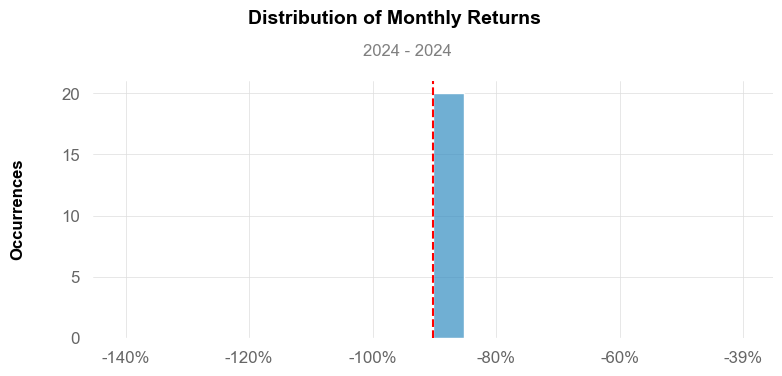

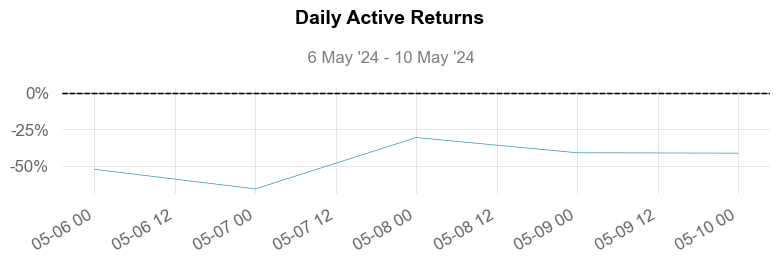

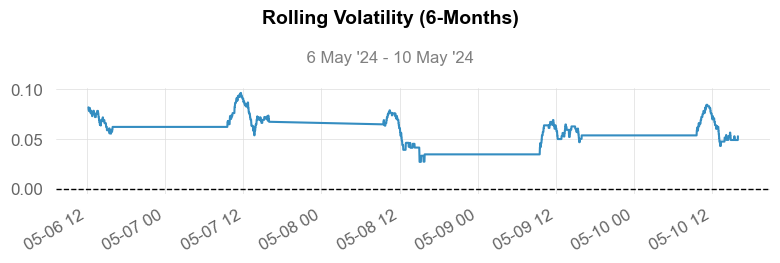

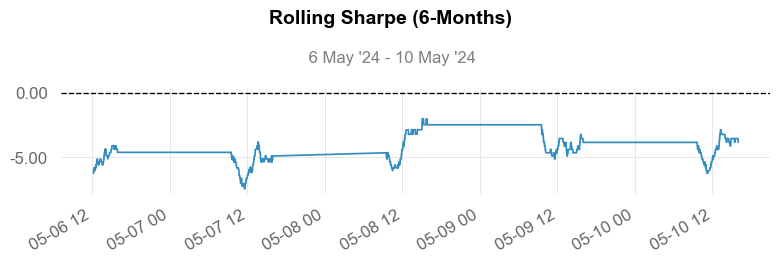

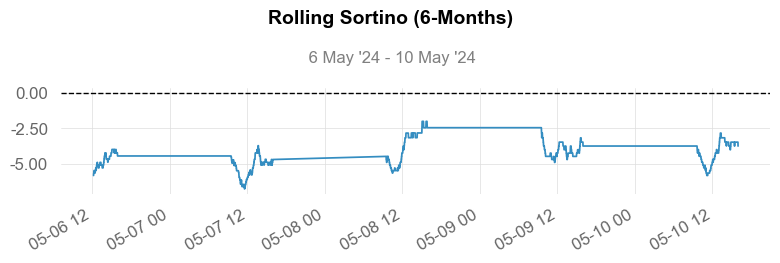

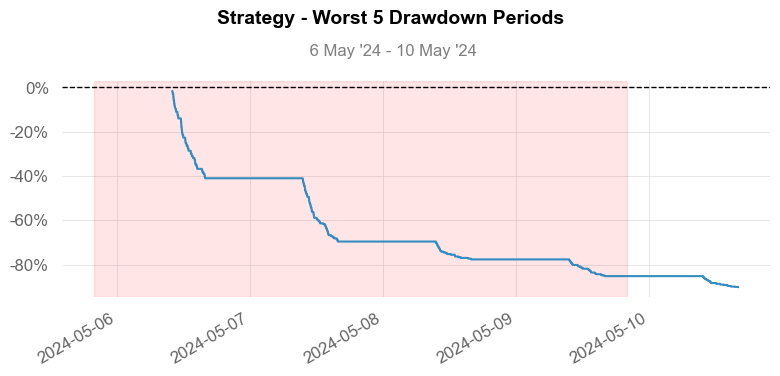

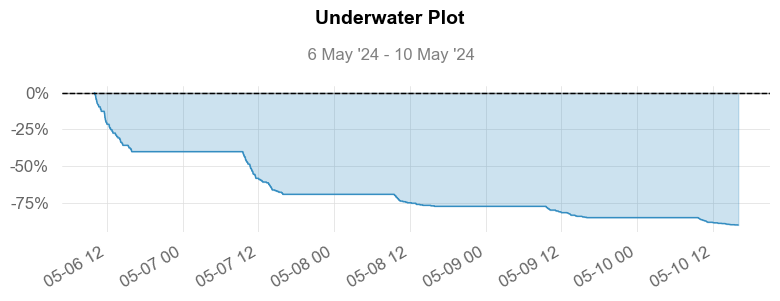

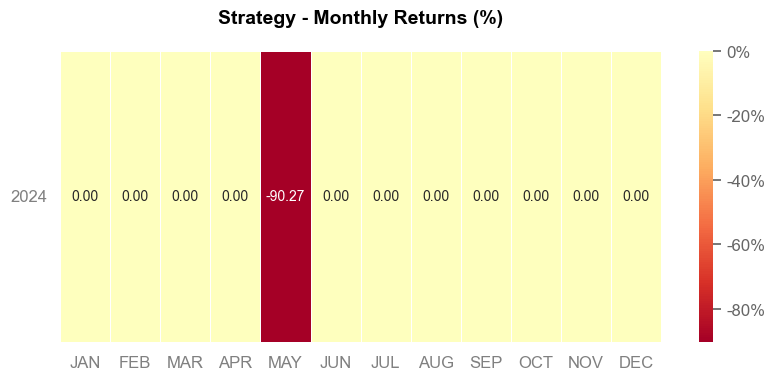

D:\all projects\stock-traiding\.venv\lib\site-packages\quantstats\_plotting\core.py:1016: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  port["Weekly"].ffill(inplace=True)
D:\all projects\stock-traiding\.venv\lib\site-packages\quantstats\_plotting\core.py:1018: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  port["Monthly"] = port["Daily"].resample("M").apply(apply_fnc)
D:\all projects\stock-traiding\.venv\lib\site-packages\quantstats\_plotting\core.py:1019: FutureWarning: A 

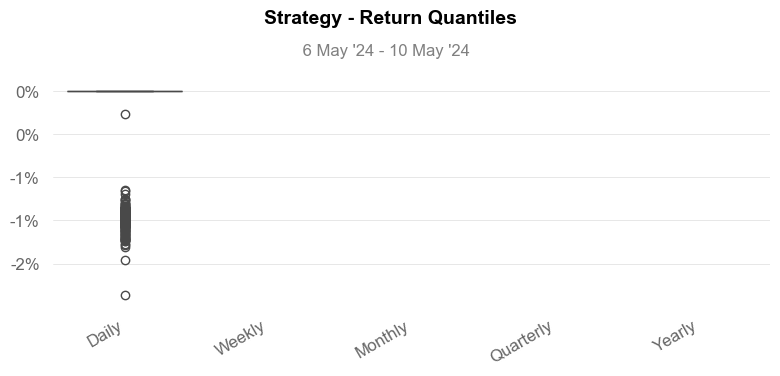

In [6]:
qs.extend_pandas()
# qs.plots.snapshot(data, title='Facebook Performance', show=True)
# print(env.unwrapped.history['total_profit'])
net_worth = pd.Series(env.unwrapped.history['total_profit'], index=data.index[30+1:len(data)])
# net_worth = pd.Series(env.unwrapped.history['total_profit'], index=data.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
# qs.reports.html(returns, output='SB3_a2c_quantstats.html')